In [2]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm

from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import *
from encoding_information.plot_utils import *
from encoding_information.bsccm_utils import *

from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


## Very similar answer if you've got the eigenvalue floor set correctly


100%|██████████| 10000/10000 [01:41<00:00, 98.40it/s]


Regular MI: 0.248
Optimized MI: 0.248

bad EV floor
Regular MI: 6353.481
Optimized MI: 0.250


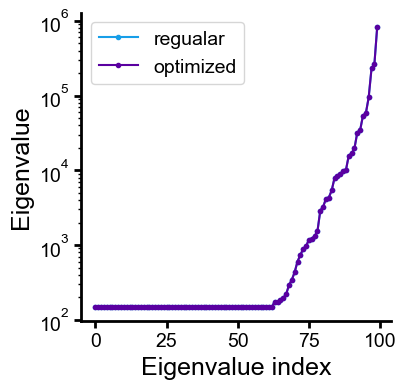

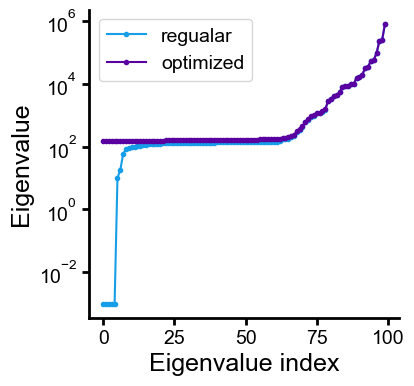

In [8]:
# load images, extract patches, and compute cov mats
edge_crop = 32
patch_size = 10
num_images = 10000
num_patches = 10000
channel = 'LED119'

images = load_bsccm_images(bsccm, channel=channel, num_images=num_images, edge_crop=edge_crop, median_filter=False)
seed = 10 # this seed gives a really bad inital fit
# seed = 1
patches = extract_patches(images, patch_size, num_patches=num_images, seed=seed, verbose=True)

eigenvalue_floor = 1.5e2

mi_regular, gp_regular = estimate_mutual_information(patches, use_iterative_optimization=False, verbose=False, return_entropy_model=True, eigenvalue_floor=eigenvalue_floor)
mi_optimized, gp_optimized = estimate_mutual_information(patches, use_iterative_optimization=True, verbose=False, return_entropy_model=True, eigenvalue_floor=eigenvalue_floor)

print(f"Regular MI: {mi_regular:.3f}")
print(f"Optimized MI: {mi_optimized:.3f}")
plot_eigenvalues(regualar=gp_regular.get_cov_mat(), optimized=gp_optimized.get_cov_mat())


print ('\nbad EV floor')
eigenvalue_floor = 1e-3

mi_regular, gp_regular = estimate_mutual_information(patches, use_iterative_optimization=False, verbose=False, return_entropy_model=True, eigenvalue_floor=eigenvalue_floor)
mi_optimized, gp_optimized = estimate_mutual_information(patches, use_iterative_optimization=True, verbose=False, return_entropy_model=True, eigenvalue_floor=eigenvalue_floor)

print(f"Regular MI: {mi_regular:.3f}")
print(f"Optimized MI: {mi_optimized:.3f}")
plot_eigenvalues(regualar=gp_regular.get_cov_mat(), optimized=gp_optimized.get_cov_mat())

## But it only takes a few iterations to get it right

Computing loss: 8it [00:00, 11.98it/s]


Initial validation NLL: 3376.15


Epoch 1: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]
Computing loss: 8it [00:00, 58.98it/s]


Epoch 1: validation NLL: 4.62


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 28.53it/s]
Computing loss: 8it [00:00, 60.55it/s]


Epoch 2: validation NLL: 4.57


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 32.90it/s]
Computing loss: 8it [00:00, 59.85it/s]


Epoch 3: validation NLL: 4.55


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 29.40it/s]
Computing loss: 8it [00:00, 62.73it/s]


Epoch 4: validation NLL: 4.55


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 29.49it/s]
Computing loss: 8it [00:00, 58.66it/s]


Epoch 5: validation NLL: 4.55


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 33.23it/s]
Computing loss: 8it [00:00, 69.00it/s]


Epoch 6: validation NLL: 4.54


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 34.37it/s]
Computing loss: 8it [00:00, 58.74it/s]


Epoch 7: validation NLL: 4.54


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 33.22it/s]
Computing loss: 8it [00:00, 59.30it/s]


Epoch 8: validation NLL: 4.54


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 29.38it/s]
Computing loss: 8it [00:00, 60.41it/s]


Epoch 9: validation NLL: 4.54


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 29.38it/s]
Computing loss: 8it [00:00, 60.36it/s]


Epoch 10: validation NLL: 4.55


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 27.68it/s]
Computing loss: 8it [00:00, 61.08it/s]


Epoch 11: validation NLL: 4.55


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 27.84it/s]
Computing loss: 8it [00:00, 60.78it/s]


Epoch 12: validation NLL: 4.54


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 29.20it/s]
Computing loss: 8it [00:00, 62.89it/s]


Epoch 13: validation NLL: 4.55


Epoch 14: 100%|██████████| 1/1 [00:00<00:00, 35.49it/s]
Computing loss: 8it [00:00, 59.96it/s]


Epoch 14: validation NLL: 4.55


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 31.23it/s]
Computing loss: 8it [00:00, 60.24it/s]


Epoch 15: validation NLL: 4.55


Epoch 16: 100%|██████████| 1/1 [00:00<00:00, 29.78it/s]
Computing loss: 8it [00:00, 60.01it/s]


Epoch 16: validation NLL: 4.54


Epoch 17: 100%|██████████| 1/1 [00:00<00:00, 33.78it/s]
Computing loss: 8it [00:00, 62.43it/s]


Epoch 17: validation NLL: 4.55


Epoch 18: 100%|██████████| 1/1 [00:00<00:00, 26.48it/s]
Computing loss: 8it [00:00, 61.46it/s]


Epoch 18: validation NLL: 4.54


Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 28.12it/s]
Computing loss: 8it [00:00, 62.63it/s]


Epoch 19: validation NLL: 4.54


Epoch 20: 100%|██████████| 1/1 [00:00<00:00, 29.92it/s]
Computing loss: 8it [00:00, 58.56it/s]


Epoch 20: validation NLL: 4.55


Epoch 21: 100%|██████████| 1/1 [00:00<00:00, 38.49it/s]
Computing loss: 8it [00:00, 60.25it/s]


Epoch 21: validation NLL: 4.54


Epoch 22: 100%|██████████| 1/1 [00:00<00:00, 29.50it/s]
Computing loss: 8it [00:00, 62.82it/s]


Epoch 22: validation NLL: 4.55


Epoch 23: 100%|██████████| 1/1 [00:00<00:00, 30.79it/s]
Computing loss: 8it [00:00, 60.12it/s]


Epoch 23: validation NLL: 4.54


Epoch 24: 100%|██████████| 1/1 [00:00<00:00, 33.08it/s]
Computing loss: 8it [00:00, 62.97it/s]


Epoch 24: validation NLL: 4.55


Epoch 25: 100%|██████████| 1/1 [00:00<00:00, 29.96it/s]
Computing loss: 8it [00:00, 60.53it/s]


Epoch 25: validation NLL: 4.55


Epoch 26: 100%|██████████| 1/1 [00:00<00:00, 29.05it/s]
Computing loss: 8it [00:00, 60.09it/s]


Epoch 26: validation NLL: 4.55


Epoch 27: 100%|██████████| 1/1 [00:00<00:00, 25.12it/s]
Computing loss: 8it [00:00, 72.86it/s]


Epoch 27: validation NLL: 4.54


Epoch 28: 100%|██████████| 1/1 [00:00<00:00, 43.91it/s]
Computing loss: 8it [00:00, 102.53it/s]


Epoch 28: validation NLL: 4.55


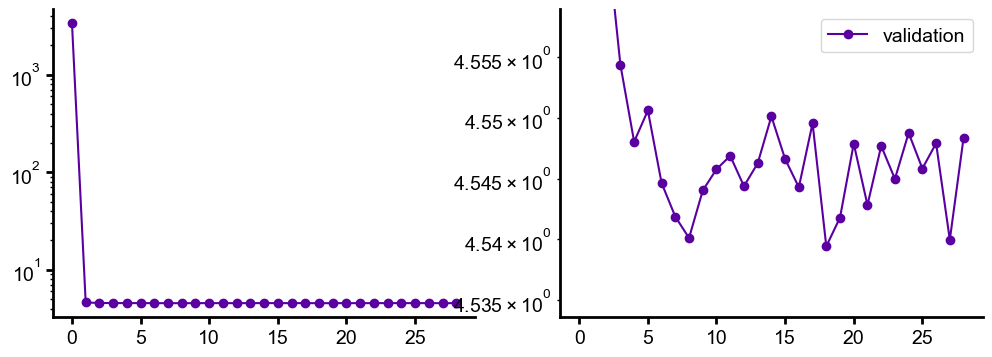

In [7]:
gp = StationaryGaussianProcess(patches, eigenvalue_floor=eigenvalue_floor)
val_loss_history = gp.fit(patches, num_val_samples=100, max_epochs=50, patience=10, verbose=True)

plot_optimization_loss_history(val_loss_history)